<a href="https://colab.research.google.com/github/stepsbtw/Statistical-Inference/blob/main/GCC1625_T3_CAIO_PASSOS_TORKST_FERREIRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inferência Estatística (GCC1625) - Trabalho 3

- Nome completo: Caio Passos Torkst Ferreira
- [Link para vídeo](https://youtu.be/_IhcTRlDYos)

# 1) Correlação e covariância

Você é analista de dados de uma empresa de educação. Foram coletadas informações sobre os seguintes atributos de alunos de um curso online:

- horas_estudo: número de horas que o aluno estudou na semana;
- nota_final: nota final no curso (0 a 100).

Seu objetivo é investigar a relação entre essas duas variáveis. Você deve usar
os dados simulados gerados pelo bloco de código fornecido abaixo.



In [390]:
import numpy as np
import pandas as pd

np.random.seed(42)
horas_estudo = np.random.normal(10, 2, 30) # variavel livre
nota_final = 50 + 4 * horas_estudo + np.random.normal(0, 5, 30) # variavel dependente

df = pd.DataFrame({
  'Horas de Estudo': horas_estudo,
  'Nota Final': nota_final
})

###1.1 Cálculo Manual

Use as funções np.mean(), np.std() e np.cov() para comparar seus resultados.

1. Calcule a **média** de cada variável

In [391]:
n = len(horas_estudo)

media_horas_estudo = sum(horas_estudo) / n
media_nota_final = sum(nota_final) / n

print(media_horas_estudo, media_nota_final)
print(horas_estudo.mean(), nota_final.mean())

9.623706208297927 87.88901248174199
9.623706208297927 87.88901248174199


2. Calcule a **covariância amostral**:

In [392]:
# vetorialmente
cov = sum((horas_estudo - media_horas_estudo) * (nota_final - media_nota_final)) / (n-1)

print(cov)
print(np.cov(horas_estudo, nota_final, ddof=1)[0][1])

13.788410270749694
13.788410270749694


3. Calcule a **correlação de Pearson**

In [393]:
desvio_horas_estudo = np.sqrt(sum((horas_estudo - media_horas_estudo)**2) / (n-1)) # amostral
desvio_nota_final = np.sqrt(sum((nota_final - media_nota_final)**2) / (n-1))

print(desvio_horas_estudo, desvio_nota_final)
print(horas_estudo.std(ddof=1), nota_final.std(ddof=1))

1.8000128548048226 8.952112839804329
1.8000128548048226 8.952112839804329


In [394]:
corr = cov / (desvio_horas_estudo * desvio_nota_final)

print(corr)
print(np.corrcoef(horas_estudo, nota_final)[0][1])

0.8556832738480706
0.8556832738480707


### 1.2 Visualização

1. Crie um gráfico de dispersão entre horas_estudo e nota_final
2. Adicione uma linha de tendência linear;
3. Interprete o resultado: a relação é positiva, negativa ou nula

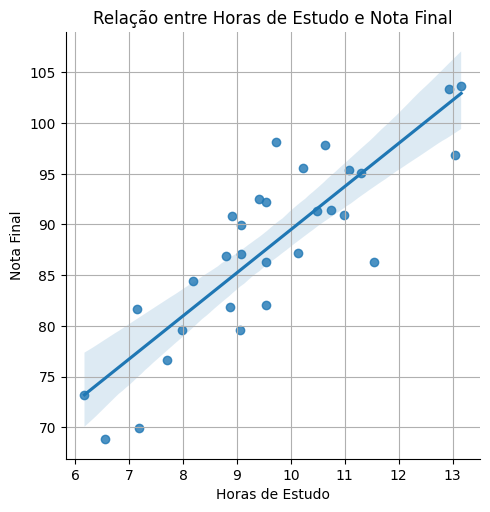

In [395]:
import seaborn as sns
import matplotlib .pyplot as plt

sns.lmplot(x='Horas de Estudo', y='Nota Final', data=df)
plt.title('Relação entre Horas de Estudo e Nota Final')
plt.grid(True)
plt.show()

A relação é positiva!

### 1.3 Interpretação
- O valor da correlação está mais próximo de 0, +1 ou –1? O que isso indica?
- A covariância obtida é positiva ou negativa? O que isso significa no contexto?
- Se a unidade da nota fosse alterada (ex: de 0–100 para 0–10), o valor da
correlação mudaria? E a covariância?

O valor da correlação está mais próxima de +1. Isso indica que o aumento em uma variável geralmente acontece junto ao aumento de outra variável.

A covariância é positiva. Os alunos que estudam por mais tempo, tendem a ter uma nota melhor, e vice-versa.

A covariância mudaria. Mas não a correlação, a qual é apenas uma espécie de normalização da covariância.

### 1.4 Outras simulações
- Gere um novo conjunto de dados em que a correlação entre horas_estudo
e nota_final seja próxima de zero;
- Gere um conjunto com correlação negativa entre as variáveis.

-0.09358667141750737


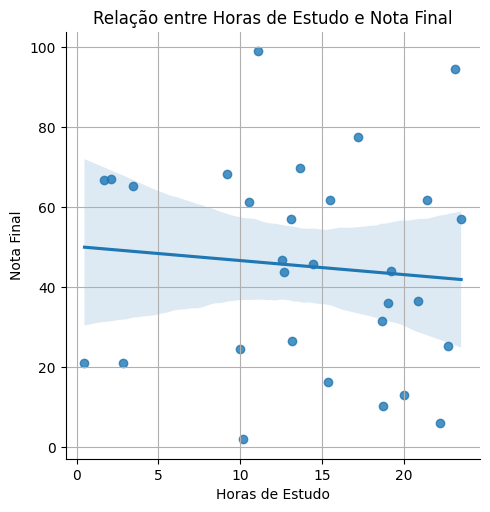

In [396]:
np.random.seed(0)

n = 30
horas_estudo = np.random.uniform(0, 24, n)
nota_final = np.random.uniform(0, 100, n)

corr = np.corrcoef(horas_estudo, nota_final)[0][1]
print(corr)

df_zero = pd.DataFrame({'Horas de Estudo': horas_estudo, 'Nota Final': nota_final})

import seaborn as sns
import matplotlib .pyplot as plt

sns.lmplot(x='Horas de Estudo', y='Nota Final', data=df_zero)
plt.title('Relação entre Horas de Estudo e Nota Final')
plt.grid(True)
plt.show()

-0.8240981003903521


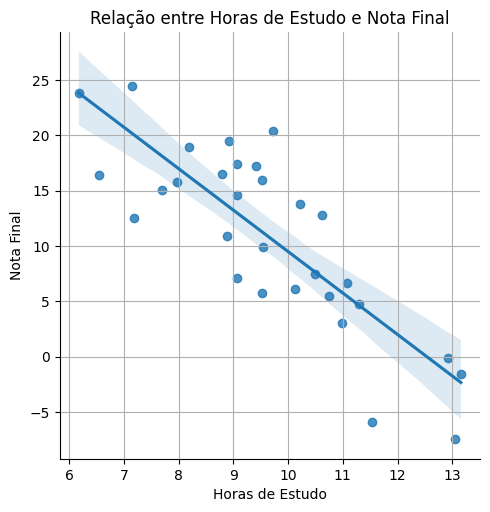

In [397]:
import numpy as np
import pandas as pd

np.random.seed(42)
horas_estudo = np.random.normal(10, 2, 30) # variavel livre
nota_final = 50 - 4 * horas_estudo + np.random.normal(0, 5, 30) # variavel dependente

df_neg = pd.DataFrame({
  'Horas de Estudo': horas_estudo,
  'Nota Final': nota_final
})

corr = np.corrcoef(horas_estudo, nota_final)[0][1]
print(corr)

import seaborn as sns
import matplotlib .pyplot as plt

sns.lmplot(x='Horas de Estudo', y='Nota Final', data=df_neg)
plt.title('Relação entre Horas de Estudo e Nota Final')
plt.grid(True)
plt.show()

#2) Regressão Linear Múltipla

Considere o conjunto de dados Auto. O arquivo Auto.csv contém os dados para
essa parte do trabalho. Esse arquivo está na plataforma MS Teams.

In [398]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/data/Auto.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [400]:
df_tratado = df.replace("?", np.nan)
df_tratado.dropna(inplace=True)

In [401]:
df_tratado['horsepower'] = pd.to_numeric(df_tratado['horsepower'])

(i) Produza uma matriz de gráfico de dispersão que inclua todas as variáveis
no conjunto de dados.

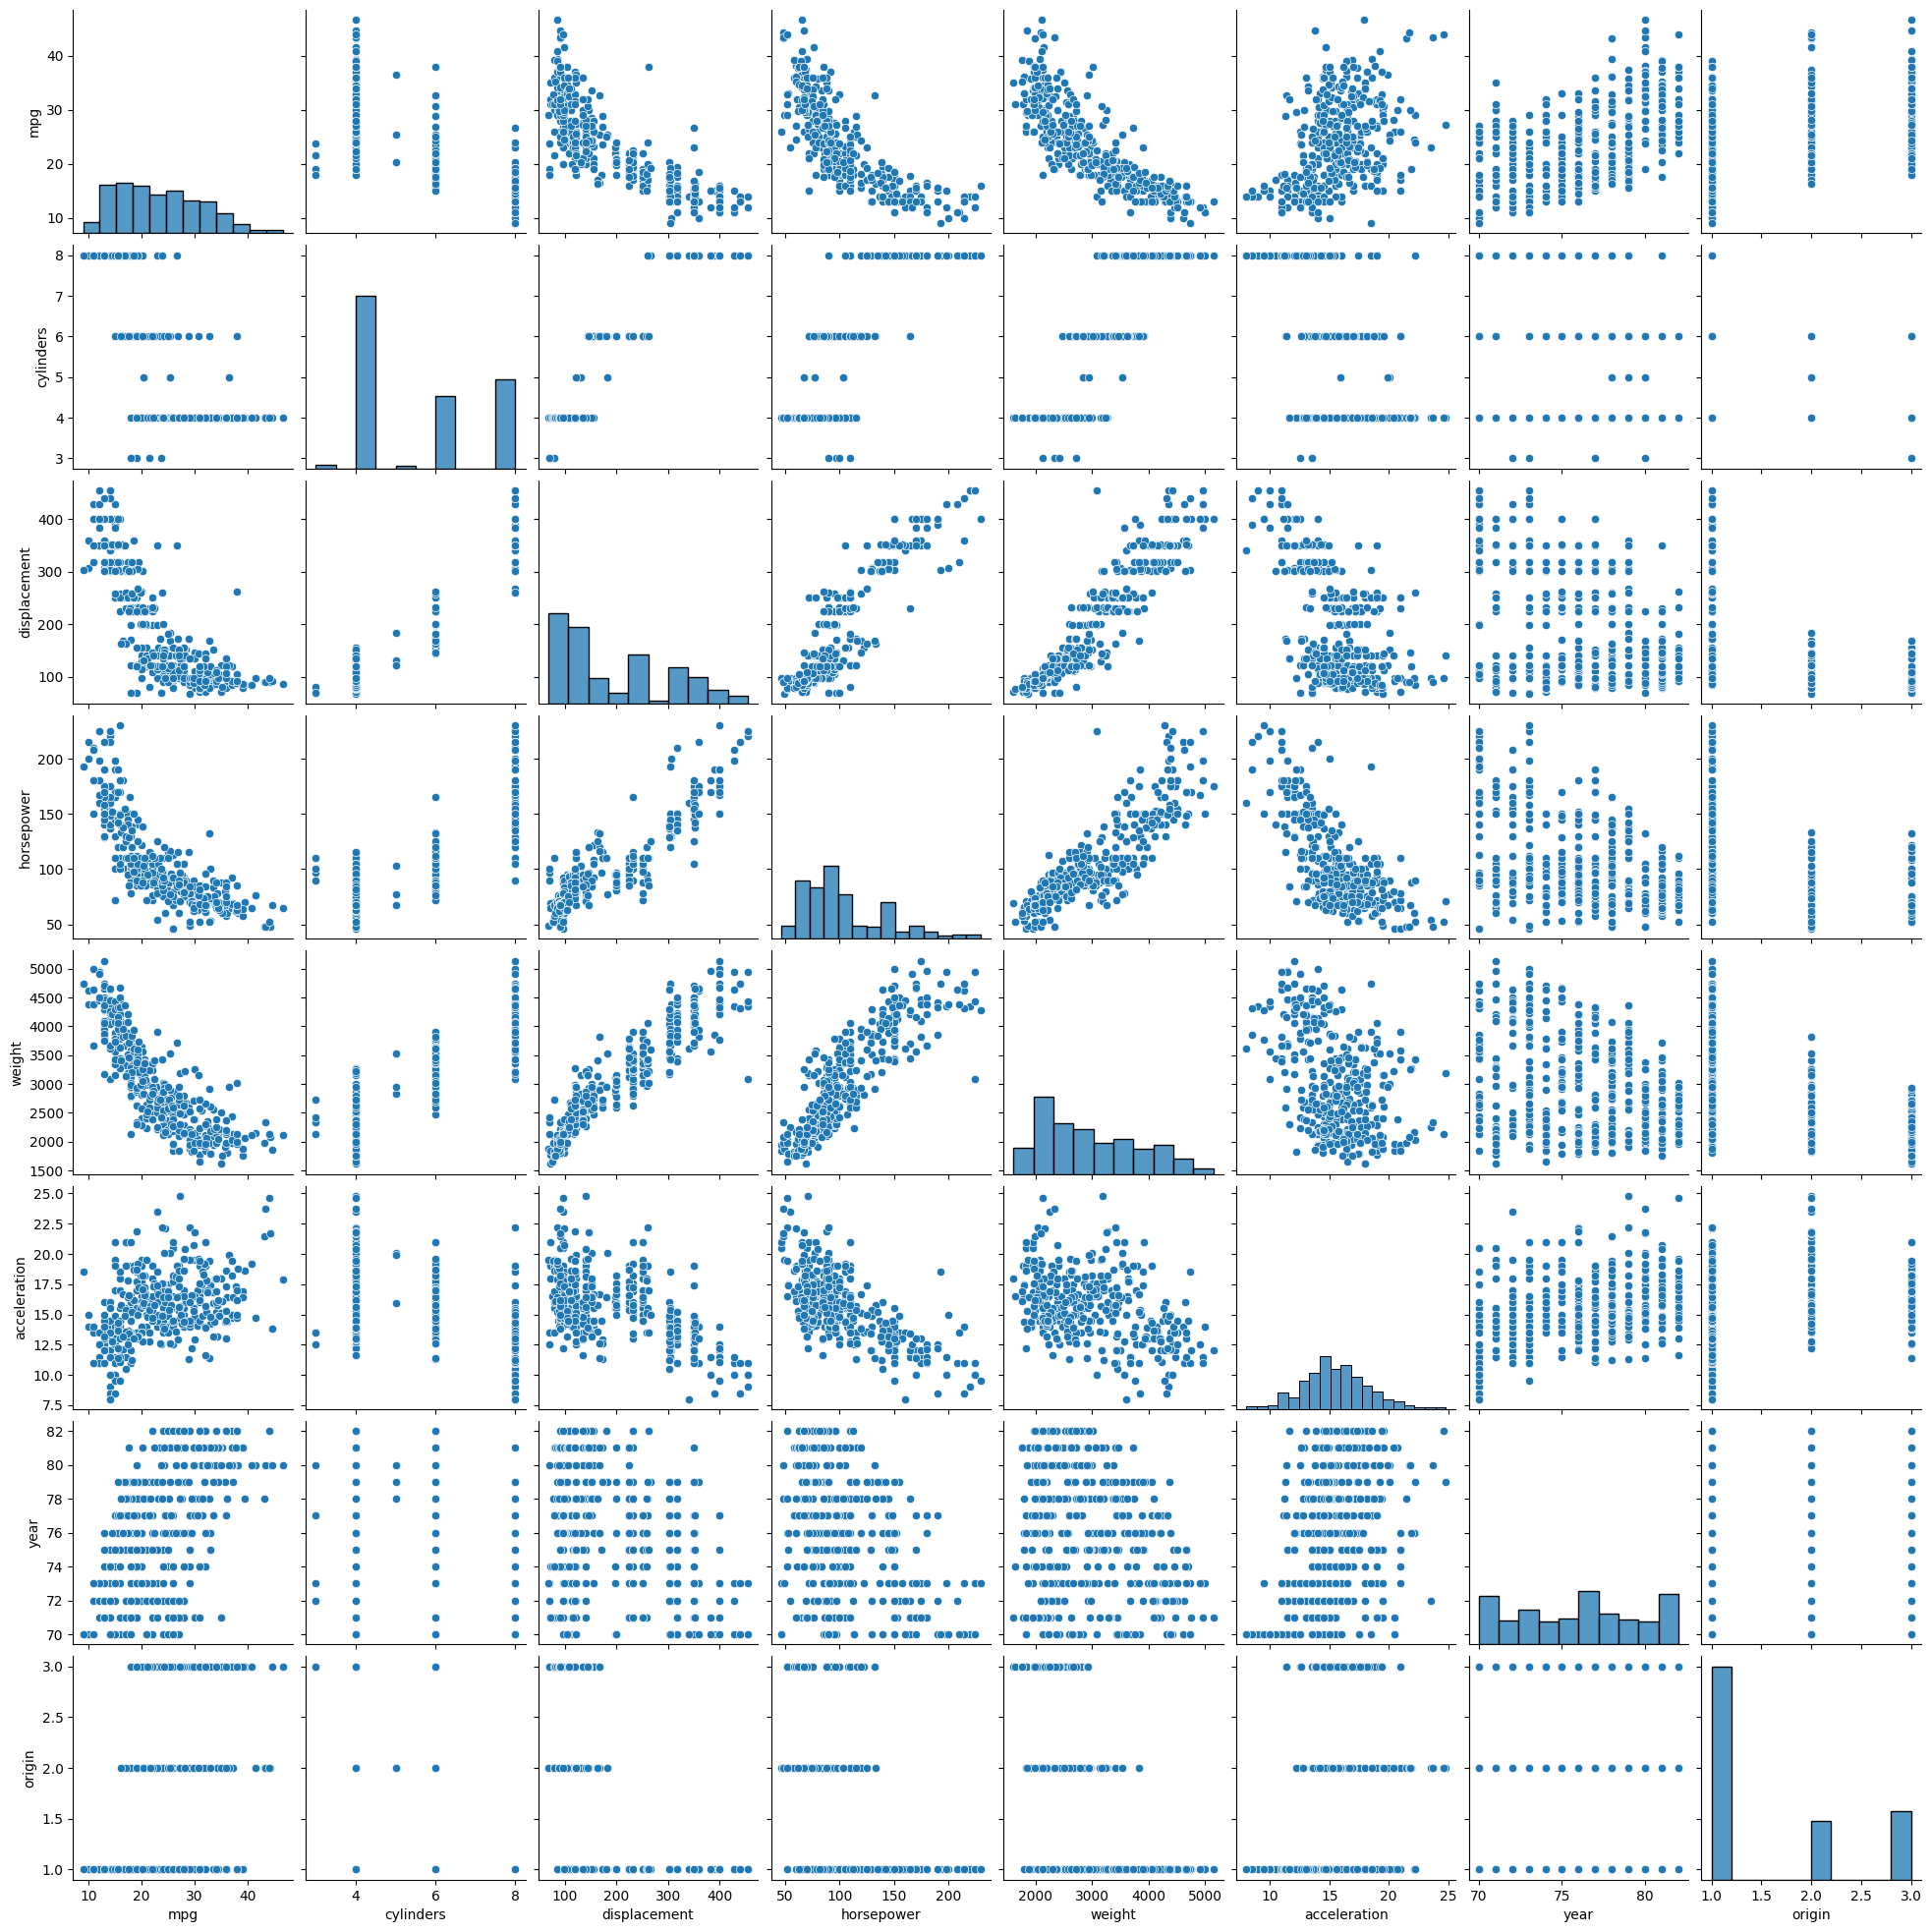

In [402]:
import seaborn as sns
sns.pairplot(df_tratado)

É possível observar as relações (linear ou não linear) por exemplo, da variável mpg :
- mpg e cylinders (negativa)
- mpg e displacement (negativa)
- mpg e weight (negativa)
- mpg e acceleration (positiva, baixa)
- mpg e year (positiva, baixa)
- mpg e origin (positiva, baixa)

(ii) Calcule a matriz de correlações entre as variáveis usando a função corr()
do pandas.DataFrame. Você precisará excluir a variável name, que é qualitativa.

A variável horsepower parece estar no tipo object. Elementos faltantes foram codificados com "?".

In [403]:
df_num = df_tratado.drop(columns=["name"])
corr = df_num.corr()
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


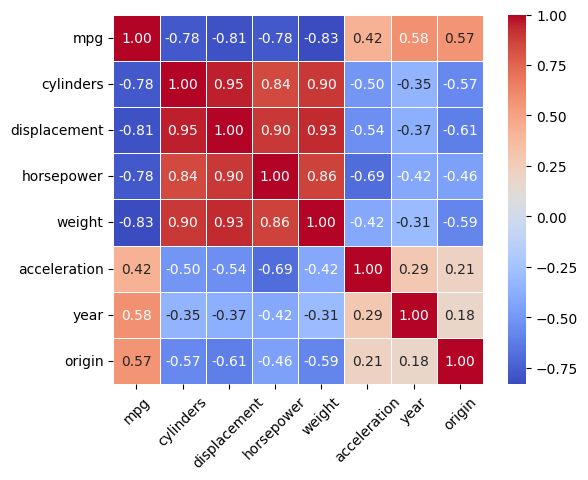

In [404]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5)
plt.xticks(rotation=45)
plt.show()

Existe forte correlação negativa entre MPG e (cylinders, displacement, horsepower, weight)

Existe forte correlação positiva entre cylinders e (displacement, horsepower e weight).

(iii) Use a função ols() da biblioteca statsmodels para realizar uma regressão
linear múltipla com mpg como resposta e todas as outras variáveis (exceto
nome) como os preditores. Use a função summary() para imprimir os resultados. Comente sobre a saída.

In [405]:
import statsmodels.api as sm

model = sm.OLS(df_num["mpg"], df_num.drop(columns=["mpg"]))
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2933.
Date:                Mon, 30 Jun 2025   Prob (F-statistic):                        0.00
Time:                        04:29:40   Log-Likelihood:                         -1030.4
No. Observations:                 392   AIC:                                      2075.
Df Residuals:                     385   BIC:                                      2103.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

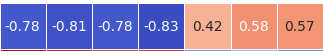

(a) Existe uma relação entre os preditores e a resposta?

(b) Quais preditores parecem ter um valor estatisticamente significativo
com relação à resposta?

(c) O que sugere o coeficiente correspondente à variável ano?

Coeficientes angulares: **variação esperada de $Y$ pra cada unidade aumentada em $X$**, mantendo as outras constantes, mede relação causal.

a) Sim, existe relação das variáveis com a resposta.

Podemos ver pelo p_valor do teste $F$. Onde mostramos que pelo menos um dos preditores tem relação com a resposta.

Também podemos ver pela métrica $R^2$, onde 98% da variância é explicada pelos preditores.

b) Os preditores estatísticamente significativos são: Todos menos a variável **acceleration**.

c) Que ao longo dos anos, os carros foram ficando mais econômicos, andando mais milhas por galão.

(iv) Use a função regplot3 da biblioteca seaborn para produzir gráficos de diagnóstico do ajuste de regressão linear. Comente sobre quaisquer problemas
que você encontrar com o ajuste.

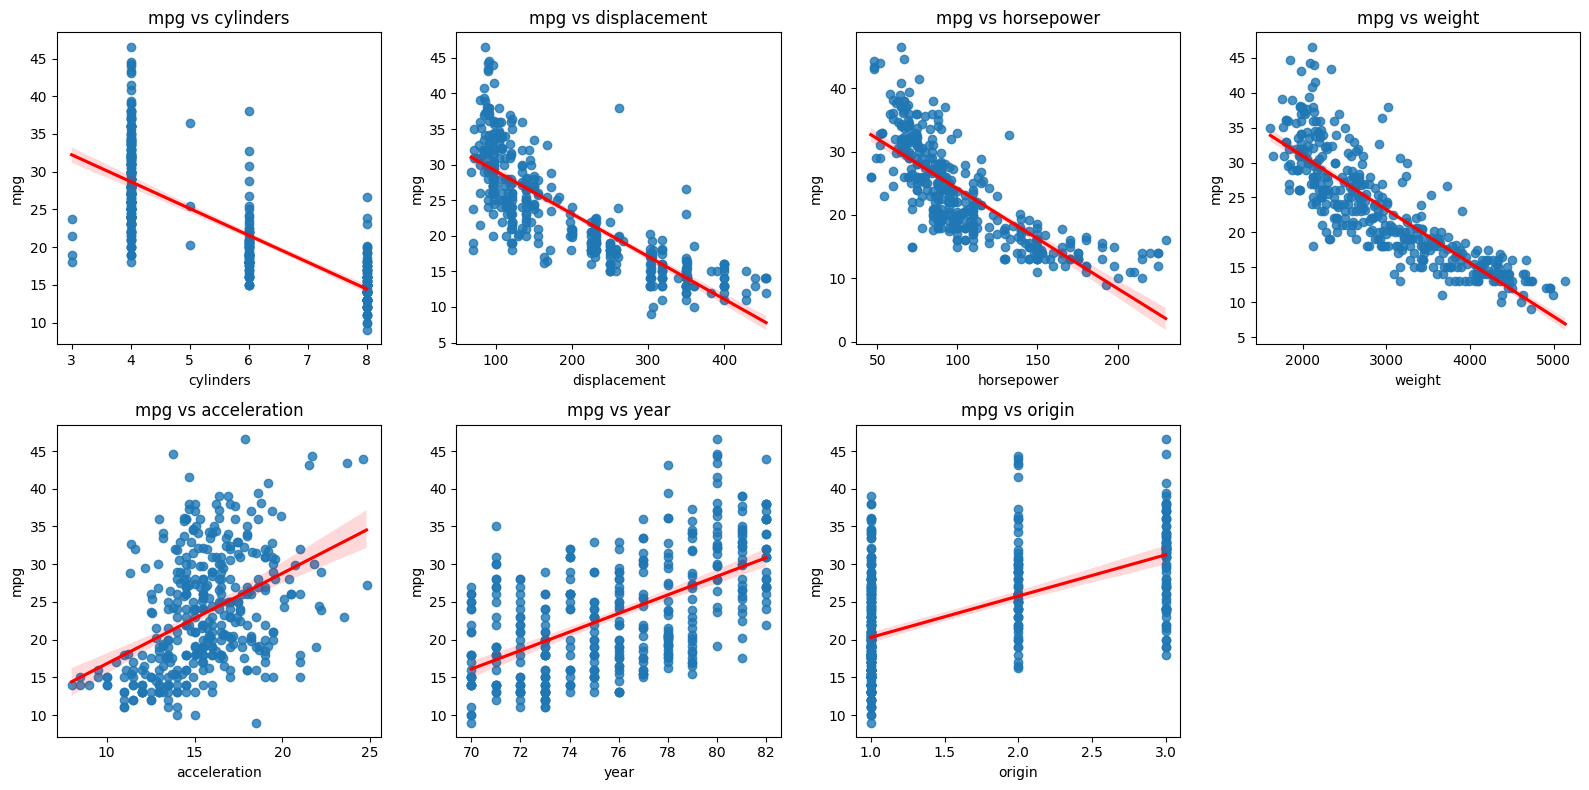

In [406]:
import matplotlib.pyplot as plt
import seaborn as sns

predictors = [col for col in df_num.columns if col != "mpg"]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

for ax, col in zip(axes, predictors):
    sns.regplot(data=df_num, x=col, y="mpg", ax=ax, line_kws={"color": "red"})
    ax.set_title(f"mpg vs {col}")

for i in range(len(predictors), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


1. Origin e Cylinders são variáveis categóricas codificadas com números, e não valores contínuos.

2. Year é um bom preditor apesar de discreto.

3. Acceleration é extremamente disperso e apresenta **baixo poder preditivo**

#3) DiD: Salário mínimo x taxa de empregos

Nesta parte, você irá replicar um estudo realizado originalmente por Card and
Krueger [1994] sobre o efeito do aumento do salário mínimo sobre a taxa
de empregos4.

A teoria econômica convencional sugere que num mercado de
trabalho com concorrência perfeita, um aumento no salário mínimo leva a um
aumento no desemprego.

Em abril de 1992, o estado americano de Nova Jersey
(NJ) aumentou o salário mínimo (por hora) de US$ 4,25 para US\$ 5,05. Card e
Krueger (1994) utilizaram a técnica Difference-in-Difference (DiD) e mostraram
que este aumento nos salários mínimos levou a um aumento no emprego no setor
dos restaurantes de fast food.

O grupo de controle utilizado nesse estudo foi
o estado vizinho da Pensilvânia (PA), que não foi sujeito a essa mudança de
política. Os autores realizaram uma pesquisa antes e depois do aumento do
salário mínimo com uma amostra representativa de restaurantes de fast food
em NJ e PA.

Esta configuração pode ser considerada quase experimental, uma
vez que ambos os estados não são idênticos em muitos aspectos e o processo
legislativo, para aumentar o salário mínimo, não foi iniciado ao acaso.

O arquivo card_krueger_1994_mod.csv contém os dados para essa parte do
trabalho. Esse arquivo está na plataforma MS Teams.

In [407]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/AILAB-CEFET-RJ/gcc1625/refs/heads/main/data/card_krueger_1994_mod.csv", index_col=0)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 820 entries, 1 to 820
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bonus        410 non-null    object 
 1   chain        820 non-null    object 
 2   co_owned     820 non-null    object 
 3   date         410 non-null    object 
 4   empft        802 non-null    float64
 5   emppt        806 non-null    float64
 6   firstinc     697 non-null    float64
 7   hrsopen      809 non-null    float64
 8   inctime      723 non-null    float64
 9   meals        809 non-null    object 
 10  ncalls       571 non-null    float64
 11  nmgrs        808 non-null    float64
 12  nregs        792 non-null    float64
 13  nregs11      781 non-null    float64
 14  observation  820 non-null    object 
 15  open         809 non-null    float64
 16  pctaff       366 non-null    float64
 17  pentree      784 non-null    float64
 18  pfry         775 non-null    float64
 19  psoda        

,bonus,chain,co_owned,date,empft,emppt,firstinc,hrsopen,inctime,meals,...,psoda,region,sheet,special,state,status,type,wage_st,emptot,pct_fte
1,yes,bk,no,NaN,30.0,15.0,NaN,16.5,19.0,reduced price meals,...,1.03,phillypa,46,NaN,Pennsylvania,NaN,NaN,NaN,40.50,74.074074
2,no,kfc,no,NaN,6.5,6.5,NaN,13.0,26.0,reduced price meals,...,1.01,phillypa,49,NaN,Pennsylvania,NaN,NaN,NaN,13.75,47.272727
3,no,kfc,yes,NaN,3.0,7.0,0.37,10.0,13.0,reduced price meals,...,0.95,phillypa,506,NaN,Pennsylvania,NaN,NaN,NaN,8.50,35.294118
4,yes,wendys,yes,NaN,20.0,20.0,0.10,12.0,26.0,reduced price meals,...,0.87,phillypa,56,NaN,Pennsylvania,NaN,NaN,5.00,34.00,58.823529
5,yes,wendys,yes,NaN,6.0,26.0,0.15,12.0,52.0,both free and reduced price meals,...,0.87,phillypa,61,NaN,Pennsylvania,NaN,NaN,5.50,24.00,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,NaN,kfc,yes,1992-11-14,19.0,3.5,0.50,11.0,13.0,free meals,...,1.05,northj,423,no,New Jersey,answered 2nd interview,phone,5.25,23.75,80.000000
817,NaN,kfc,yes,1992-11-17,12.0,3.0,0.50,14.0,19.0,free meals,...,1.05,northj,424,no,New Jersey,answered 2nd interview,phone,5.25,17.50,68.571429
818,NaN,roys,yes,1992-11-11,5.0,25.0,0.25,18.0,19.0,reduced price meals,...,1.11,northj,426,yes,New Jersey,answered 2nd interview,phone,5.05,20.50,24.390244
819,NaN,wendys,no,1992-12-17,0.0,35.0,NaN,12.5,NaN,reduced price meals,...,1.11,northj,427,yes,New Jersey,answered 2nd interview,personal,5.05,20.50,0.000000


Queremos estudar o efeito causal do aumento do salario miniumo sobre a a taxa de empregos.

O grupo de tratamento foi NOVA JERSEY
O grupo de controle foi a PENSILVANIA

Estudo apontou que aumentar o salario minimo levou um aumento no emprego.

NAO SAO IDENTICOS EM MUITOS ASPECTOS.

In [408]:
tratamento = df[df["state"] == "New Jersey"]
controle = df[df["state"] == "Pennsylvania"]

tratamento.shape, controle.shape

((662, 29), (158, 29))

### (i) Reproduza o gráfico apresentado na Figura 1 do estudo supra-mencionado.
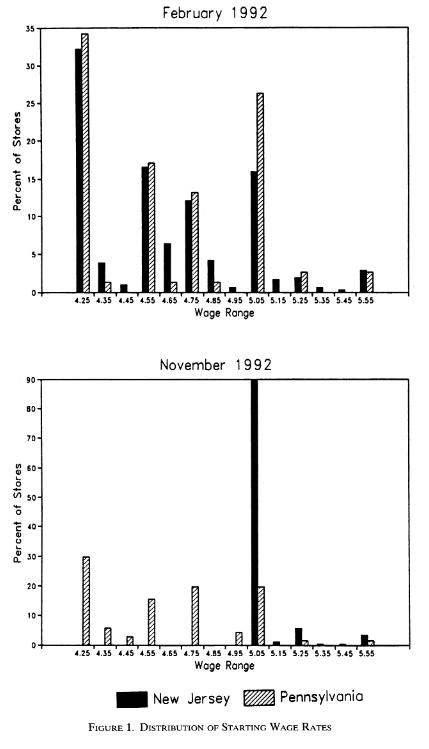

In [409]:
tratamento = tratamento.dropna(subset=["wage_st", "observation", "emptot"])
controle = controle.dropna(subset=["wage_st", "observation", "emptot"])

tratamento.shape, controle.shape

((615, 29), (145, 29))

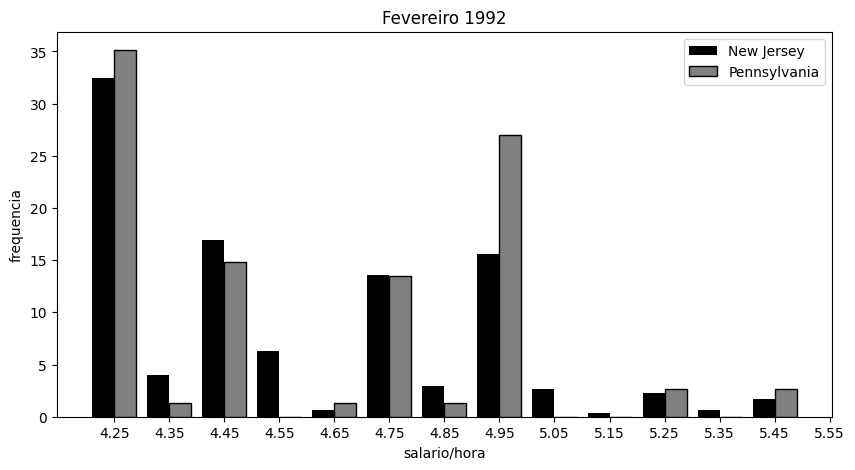

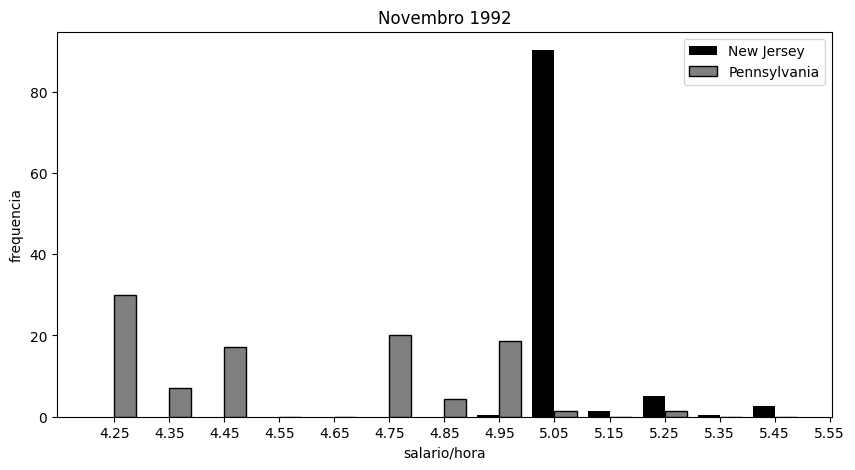

In [410]:
import matplotlib.pyplot as plt
import numpy as np

# filtrando
tratamento_feb = tratamento[tratamento["observation"]=="February 1992"]
controle_feb = controle[controle["observation"]=="February 1992"]
tratamento_nov = tratamento[tratamento["observation"]=="November 1992"]
controle_nov = controle[controle["observation"]=="November 1992"]

bins = np.array([4.25, 4.35, 4.45, 4.55, 4.65, 4.75, 4.85, 4.95, 5.05, 5.15, 5.25, 5.35, 5.45, 5.55])
width = 0.04

def freq_rel(data):
    counts, _ = np.histogram(data, bins=bins)
    return counts / counts.sum() * 100

# antes
plt.figure(figsize=(10,5))
plt.bar(bins[:-1] - width/2, freq_rel(tratamento_feb["wage_st"]), width=width, color="black", label="New Jersey")
plt.bar(bins[:-1] + width/2, freq_rel(controle_feb["wage_st"]), width=width, color="gray", edgecolor="black", label="Pennsylvania")
plt.xticks(bins, [f"{b:.2f}" for b in bins])
plt.title("Fevereiro 1992")
plt.xlabel('salario/hora')
plt.ylabel('frequencia')
plt.legend()
plt.show()

# depois
plt.figure(figsize=(10,5))
plt.bar(bins[:-1] - width/2, freq_rel(tratamento_nov["wage_st"]), width=width, color="black", label="New Jersey")
plt.bar(bins[:-1] + width/2, freq_rel(controle_nov["wage_st"]), width=width, color="gray", edgecolor="black", label="Pennsylvania")
plt.xticks(bins, [f"{bin:.2f}" for bin in bins])
plt.title("Novembro 1992")
plt.xlabel('salario/hora')
plt.ylabel('frequencia')
plt.legend()
plt.show()



### (ii) Calcule a estimativa DiD usando a abordagem de computar a diferença das médias. Ou seja, neste item você não deve usar a statsmodels para realizar a regressão.
Use apenas Python (ou R) para computar as médias da variável de interesse para os dois grupos, antes e depois da intervenção.

In [411]:
t0 = tratamento_feb["emptot"].mean()
t1 = tratamento_nov["emptot"].mean()


c0 = controle_feb["emptot"].mean()
c1 = controle_nov["emptot"].mean()

t0, t1, c0, c1

(np.float64(20.419016393442625),
 np.float64(21.471774193548388),
 np.float64(23.429054054054053),
 np.float64(21.6056338028169))

Os grupos podem ser diferentes pré-tratamento (não posso afirmar sobre a presunção de que os grupos são paralelos).

In [412]:
tratamento_diff = t1-t0
controle_diff = c1-c0

did = tratamento_diff - controle_diff

tratamento_diff, controle_diff
print("DiD: ", did)

DiD:  2.876178051342915


Depois do tratamento (aumento no salário médio), houve um aumento na quantidade de empregados totais no grupo de tratamento em aproximadamente 2.88 empregados por restaurante.

Nesse caso, sem fazer um t-teste não posso afirmar sobre a significância desse aumento.

### (iii) Agora compute novamente a estimativa DiD, dessa vez utilizando a regressão linear. Para isso, você deve inicialmente criar duas variáveis dummy.

Um indica o início do tratamento (tempo) e é igual a zero antes do tratamento e igual a um após o tratamento. A outra variável separa as observações em grupo de tratamento e grupo controle (tratado).

Essa segunda
variável dummy é igual a um para restaurantes fast food localizados em NJ
e igual a zero para restaurantes fast food localizados no PA. Em seguida,
crie a variável de interação multiplicativa.

Finalmente, use a biblioteca
statsmodels para gerar o modelo de regressão linear. Apresente sua análise
e interpretação do resultado obtido.

In [413]:
import pandas as pd
import statsmodels.api as sm

df = pd.concat([tratamento, controle], ignore_index=True)

# Dummies de tempo e grupo
df["b1_tempo"] = df["observation"].apply(lambda x: 1 if x == "November 1992" else 0)
df["b2_tratado"] = df["state"].apply(lambda x: 1 if x == "New Jersey" else 0)

# Interação (DiD)
df["b3_interacao"] = df["b1_tempo"] * df["b2_tratado"]

# dependentes
y = df["emptot"]

# independentes
X = df[["b1_tempo", "b2_tratado", "b3_interacao"]]
X = sm.add_constant(X) # intercepto

# Rodar o modelo
modelo = sm.OLS(y, X).fit()

# Exibir o resumo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 emptot   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.268
Date:                Mon, 30 Jun 2025   Prob (F-statistic):             0.0793
Time:                        04:29:43   Log-Likelihood:                -2769.7
No. Observations:                 760   AIC:                             5547.
Df Residuals:                     756   BIC:                             5566.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           23.4291      1.079     21.714   

- const : modela o salário médio (controle) antes do tratamento.
- b1_tempo : mudança no grupo de controle (sem tratamento).
- b2_tratado : diferenca antes do tratamento entre grupos.
- b3_interacao : efeito causal após o tratamento no grupo tratado.

$\beta_1$ não significativo (5%) — não há evidência de mudança no grupo controle após o tempo.

$\beta_2$ é significativo (5%), o grupo tratado tem, em média, 3 empregados a menos que o de controle antes do tratamento. (!ATENÇÃO: não sei sobre a tendencia paralela!)

$\beta_3$ (DiD) não é significativo (5%), não posso sugerir aumento de 2.88 na quantidade total de empregados.

Porém o modelo tem R² próximo a 0, o que significa baixo poder explicativo.

O teste F, com p-valor = 0.0793, mostrando que talvez os preditores não tenham relação com a saída (5%).

#4) DiD: validação

A validade da abordagem diferença-em-diferenças baseia-se na suposição de que
há **tendências iguais** (equal trends) nos grupos de controle e de tratamento. De acordo com essa suposição, na ausência da intervenção (programa, tratamento),
não existiriam diferenças variáveis no tempo entre os grupos de tratamento e de
controle. Embora esta suposição não possa ser provada, sua validade pode ser
avaliada de quatro maneiras:

1. Comparar repetidamente as mudanças nos resultados dos grupos de tratamento e controle antes de o programa ser implementado (ou seja, em t-3,
t-2, t-1). Se a tendência dos resultados se mover em paralelo antes do início
do programa, teria provavelmente continuado a mover-se em conjunto na
ausência do programa.

2. Fazer um teste de placebo usando um grupo de tratamento falso. O grupo
de tratamento falso deveria ser um grupo que não foi afetado pelo programa.
Um teste placebo que revela impacto zero apoia a suposição de tendência
igual.

3. Fazer um teste de placebo usando um resultado falso. Um teste placebo
que revela impacto zero apoia a suposição de tendência igual.

4. Executar a estimativa de diferenças em diferenças usando diferentes grupos
de comparação. Estimativas semelhantes do impacto do programa confirmam a suposição de tendência igual.

Sua tarefa nesta parte do trabalho é revisitar o conjunto de dados denominado
Panel101.dta, que foi usado no exercício realizado em aula. Ao realizar esse
exercício, dividimos os países em dois grupos (controle e tratamento) usando
o ano 1994 como ponto no tempo em que houve a intervenção. Use os dados
relativos aos anos anteriores a 1994 para realizar o teste de validação descrito no item 1 acima.

In [414]:
import pandas as pd
df = pd.read_stata("https://github.com/AILAB-CEFET-RJ/gcc1625/raw/refs/heads/main/data/Panel101.dta")
df

,country,year,y,y_bin,x1,x2,x3,opinion,op
0,A,1990,1.342788e+09,1.0,0.277904,-1.107956,0.282554,Str agree,1.0
1,A,1991,-1.899661e+09,0.0,0.320685,-0.948720,0.492538,Disag,0.0
2,A,1992,-1.123436e+07,0.0,0.363466,-0.789484,0.702523,Disag,0.0
3,A,1993,2.645775e+09,1.0,0.246144,-0.885533,-0.094391,Disag,0.0
4,A,1994,3.008335e+09,1.0,0.424623,-0.729768,0.946131,Disag,0.0
...,...,...,...,...,...,...,...,...,...
65,G,1995,1.323696e+09,1.0,1.087186,-1.409817,2.829808,Str disag,0.0
66,G,1996,2.545242e+08,1.0,0.781075,-1.328000,4.278224,Str agree,1.0
67,G,1997,3.297033e+09,1.0,1.257879,-1.577367,4.587326,Disag,0.0
68,G,1998,3.011821e+09,1.0,1.242777,-1.601218,6.113762,Disag,0.0


Checar a estabilidade!

Vou assumir que o grupo tratado é o A.
Os demais são o grupo controle.

Avaliar o efeito da intervencao sobre a variavel y.

### Método 1) Avaliar as tendencias paralelas gráficamente

Esperaríamos que, para validar a suposição de tendências paralelas, as linhas devem ter **formas semelhantes**, não precisam ser idênticas, mas constantes.

In [415]:
df['tratado'] = (df['country'] == 'A').astype(int)

antes = df[df['year'] < 1994]

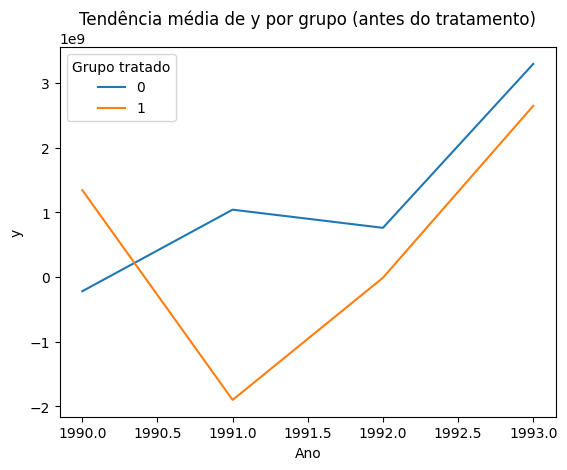

In [416]:
import seaborn as sns
import matplotlib.pyplot as plt

grouped = antes.groupby(['year', 'tratado'])['y'].mean().reset_index()

sns.lineplot(data=grouped, x='year', y='y', hue='tratado')
plt.title('Tendência média de y por grupo (antes do tratamento)')
plt.xlabel('Ano')
plt.ylabel('y')
plt.legend(title='Grupo tratado')
plt.show()

O gráfico nos mostra uma diferença forte entre os grupos de 1990 -> 1991, o que enfraquece nossa hipótese.

#5) Consumo de álcool x taxa de mortalidade

As estatísticas relacionadas com o efeito do consumo de álcool são preocupantes, desde as elevadas taxas de mortalidade por acidentes de trânsito até problemas de saúde, especialmente entre os jovens adultos. Nesta parte, você irá
replicar um estudo realizado por Carpenter and Dobkin [2009] sobre o efeito
do consumo de álcool nas taxas de mortalidade5
.

Os dados a serem usados
podem ser obtidos em http://masteringmetrics.com/wp-content/uploads/2015/01/AEJfigs.dta. A Tabela 1 descreve as colunas desse conjunto de dados

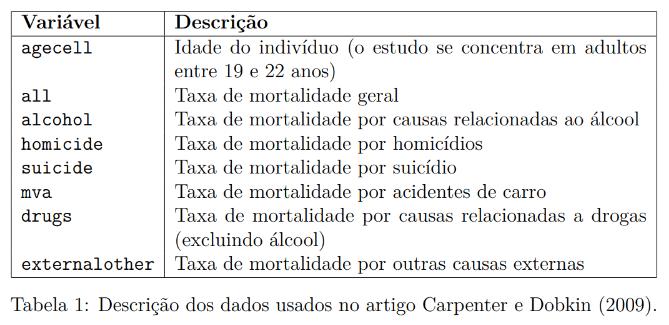

In [418]:
import requests

url = "http://masteringmetrics.com/wp-content/uploads/2015/01/AEJfigs.dta"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

response = requests.get(url, headers=headers)

# Salva o arquivo temporariamente
with open("AEJfigs.dta", "wb") as f:
    f.write(response.content)

In [419]:
import pandas as pd

df = pd.read_stata("AEJfigs.dta")
df.head()

,agecell,all,allfitted,internal,internalfitted,external,externalfitted,alcohol,alcoholfitted,homicide,homicidefitted,suicide,suicidefitted,mva,mvafitted,drugs,drugsfitted,externalother,externalotherfitted
0,19.068493,92.825401,91.706146,16.617590,16.738131,76.207817,74.968010,0.639138,0.794344,16.316818,16.284573,11.203714,11.592100,35.829327,34.817780,3.872425,3.448835,8.534373,8.388236
1,19.150684,95.100739,91.883720,18.327684,16.920654,76.773056,74.963066,0.677409,0.837575,16.859964,16.270697,12.193368,11.593611,35.639256,34.633888,3.236511,3.470022,8.655786,8.530174
2,19.232876,92.144295,92.049065,18.911053,17.098843,73.233238,74.950226,0.866443,0.877835,15.219254,16.262882,11.715812,11.595129,34.205650,34.446735,3.202071,3.492069,8.513741,8.662681
3,19.315069,88.427757,92.202141,16.101770,17.272680,72.325981,74.929466,0.867308,0.915115,16.742825,16.261148,11.275010,11.596655,32.278957,34.256302,3.280689,3.514980,8.258285,8.785728
4,19.397261,88.704941,92.342918,17.363520,17.442156,71.341415,74.900757,1.019163,0.949407,14.947726,16.265511,10.984314,11.598189,32.650967,34.062588,3.548198,3.538755,8.417533,8.899288


A descontinuidade de regressão é um desenho apropriado para estudar estas
questões, uma vez que os jovens adultos são “naturalmente” selecionados em dois
grupos com base na sua idade: os jovens adultos com menos de 21 anos não estão
legalmente autorizados a beber, enquanto os jovens adultos com mais de 21 anos
são legalmente proibidos de beber. Podemos comparar a taxa de mortalidade
entre esses dois grupos.

### (i) Reproduza o gráfico apresentado na Figura 3 do estudo acima mencionado.

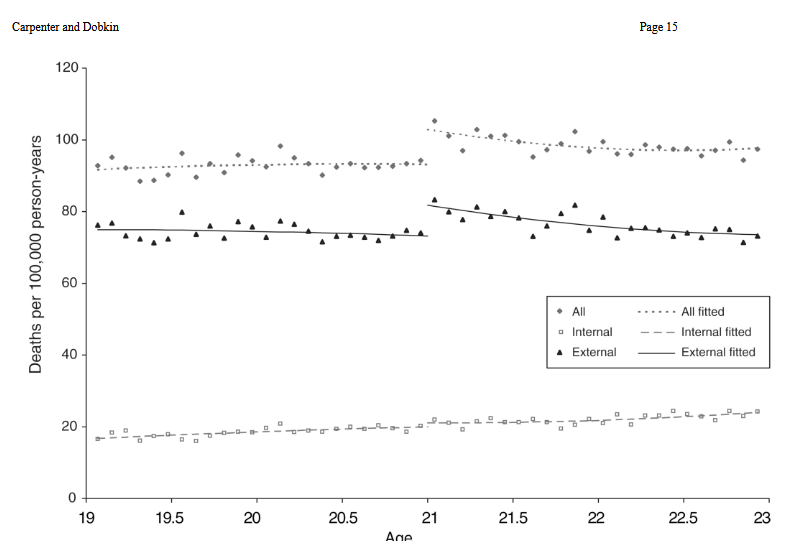

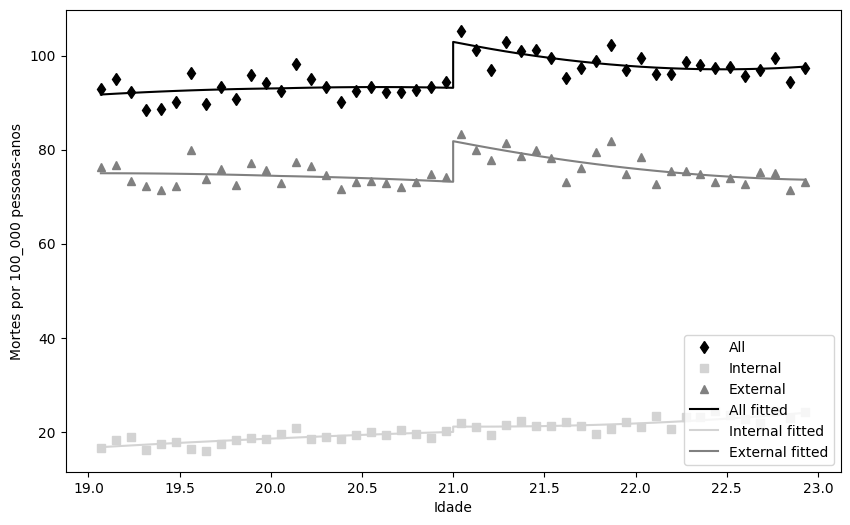

In [420]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# pontos
plt.plot(df['agecell'], df['all'], 'd', color="black", label='All')
plt.plot(df['agecell'], df['internal'], 's', color="lightgray", label='Internal')
plt.plot(df['agecell'], df['external'], '^', color="gray", label='External')

# linhas ajustadas
plt.plot(df['agecell'], df['allfitted'], color="black", label='All fitted')
plt.plot(df['agecell'], df['internalfitted'], color="lightgray", label='Internal fitted')
plt.plot(df['agecell'], df['externalfitted'], color="gray", label='External fitted')

plt.xlabel("Idade")
plt.ylabel("Mortes por 100_000 pessoas-anos")

# Legenda
plt.legend(loc='lower right')

plt.show()

## (ii) Execute uma regressão descontínua para “todas” as mortes por idade (não me refiro a todas as variáveis, apenas à variável chamada all).

Analise os resultados. Como você usa esses resultados para estimar a relação entre consumo de álcool e mortalidade?

*Nota: O conjunto de dados fornecido possui menos do que 50 observações. Sendo assim, não espere reproduzir exatamente os resultados das tabelas do artigo, que usa um conjunto de dados completo de 1.500 observações. Além disso, você também não tem as mesmas variáveis.*

In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   agecell              50 non-null     float32
 1   all                  48 non-null     float32
 2   allfitted            50 non-null     float32
 3   internal             48 non-null     float32
 4   internalfitted       50 non-null     float32
 5   external             48 non-null     float32
 6   externalfitted       50 non-null     float32
 7   alcohol              48 non-null     float32
 8   alcoholfitted        50 non-null     float32
 9   homicide             48 non-null     float32
 10  homicidefitted       50 non-null     float32
 11  suicide              48 non-null     float32
 12  suicidefitted        50 non-null     float32
 13  mva                  48 non-null     float32
 14  mvafitted            50 non-null     float32
 15  drugs                48 non-null     float

In [425]:
df = df.dropna(subset="all")

In [426]:
import statsmodels.api as sm

df["maior"] = (df["agecell"] >= 21).astype(int)

df["idade_centrada"] = df["agecell"] - 21

y = df["all"]
X = df[["maior","idade_centrada"]]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    all   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     32.99
Date:                Mon, 30 Jun 2025   Prob (F-statistic):           1.51e-09
Time:                        04:31:10   Log-Likelihood:                -110.41
No. Observations:                  48   AIC:                             226.8
Df Residuals:                      45   BIC:                             232.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             91.8414      0.805    114.

- O coeficiente "maior" é significativo, já existe evidencia de crescimento na mortalidade ao completar 21 anos, aproximadamente 7.66 mortes a mais por 100_000 pessoa-anos.

- Como "idade_centrada" não é estatísticamente significativo, (nossa tendência contínua), suegere que realmente aos 21 existe uma descontinuídade abrupta que causa forte impacto na mortalidade.

Isso sugere a relação causal entre o consumo legalizado alcóolico depois dos 21 e o aumento da mortalidade.

### (iii) Produza o gráfico todas as variáveis por idade e adicione as linhas de regressão definidas pelo resultado da regressão

(não há problema se as linhas se estenderem por toda a figura.)

O gráfico que você deve produzir aqui deve ser semelhante ao apresentado na Figura 1.

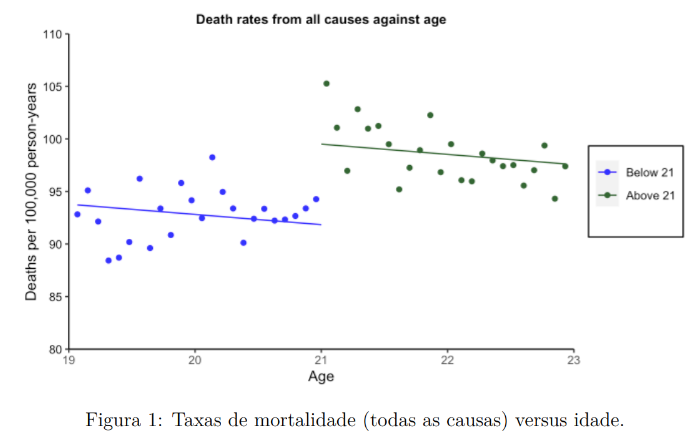

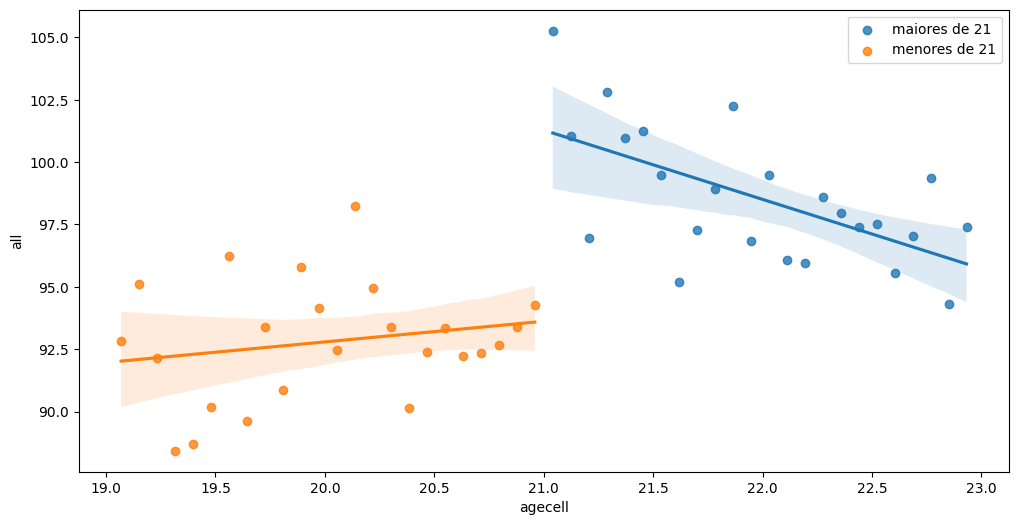

In [446]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.regplot(y=df[df["maior"]==1]["all"], x=df[df["maior"]==1]["agecell"], label="maiores de 21")
sns.regplot(y=df[df["maior"]==0]["all"], x=df[df["maior"]==0]["agecell"], label="menores de 21")
plt.legend()
plt.show()